In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

In [12]:
im = plt.imread("../data/real_images/2916_cam-image_array_.jpg", format="jpeg")
gs = np.dot(im, [0.299, 0.587, 0.114])

plt.figure(1, (16, 6))
plt.subplot(1, 2, 1)
plt.title("Original image", size=16)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.title("Image converted to grescale and thresholded", size=16)
plt.imshow(gs < 80, cmap="Greys")
plt.axhline(100, color="r", linewidth = 2)
plt.show()
plt.savefig("Threshold.png")

FileNotFoundError: [Errno 2] No such file or directory: '../data/real_images/2916_cam-image_array_.jpg'

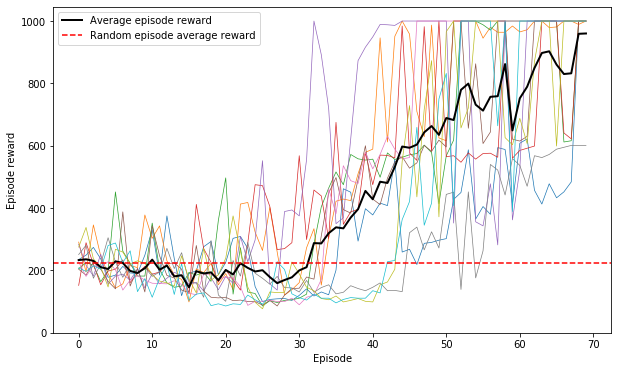

In [13]:
frames = [pd.read_csv("../records/" + x, sep=";") for x in os.listdir("../records/") if x > "log_sac_2020-06-01T13"]
data = pd.concat(frames)
total = data.groupby("Episode").mean().reset_index()
random_mean = total[total["Episode"] < 5].mean()["Reward"]

plt.figure(1, (10, 6))
for i in frames:
    plt.plot(i["Episode"], i["Reward"], linewidth="0.7")
plt.plot(total["Reward"], label="Average episode reward", linewidth=2, color = "k")
plt.axhline(random_mean, linestyle="--", color = "red", label="Random episode average reward")
plt.ylim(0)
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Episode reward")
plt.savefig("simulation_results.png")

In [5]:
frames = [pd.read_csv("../records/" + x, sep=";") for x in os.listdir("../records/") if x > "log_sac_2020-06-01T13" and x <  "log_sac_2020-06-03T11:13:05.708264"]
data = pd.concat(frames)
total = data.groupby("Episode").mean().reset_index()
random_mean = total[total["Episode"] < 5].mean()["Reward"]

plt.figure(1, (10, 6))
for i in frames:
    plt.plot(i["Episode"], i["Reward"], linewidth="0.7")
plt.plot(total["Reward"], label="Average episode reward", linewidth=2, color = "k")
plt.axhline(random_mean, linestyle="--", color = "red", label="Random episode average reward")
plt.ylim(0)
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Episode reward")
plt.savefig("simulation_results.png")

ValueError: No objects to concatenate

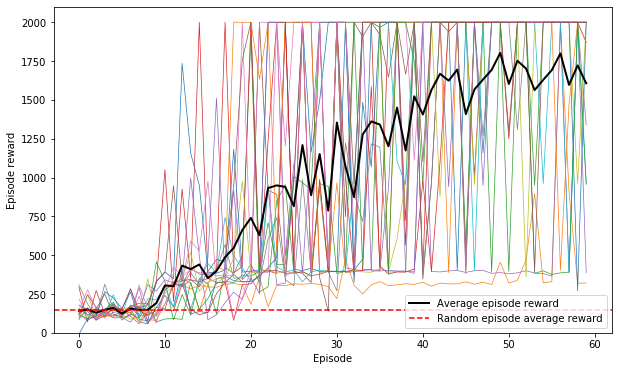

In [11]:
cherry_pick = ["log_sac_2020-06-03T18:51:53.201416.csv", "log_sac_2020-06-03T13:20:25.741204.csv"]
cherry_pick = []
frames = [pd.read_csv("../records/" + x, sep=";") for x in os.listdir("../records/") if (x > "log_sac_2020-06-03T11:13:05.708264" and x < "log_sac_2020-06-05T11:05:59.616129.csv") and (x not in cherry_pick)]
data = pd.concat(frames)
total = data.groupby("Episode").mean().reset_index()
random_mean = total[total["Episode"] < 5].median()["Reward"]

plt.figure(1, (10, 6))
for i in frames:
    plt.plot(i["Episode"], i["Reward"], linewidth="0.7")
plt.plot(total["Episode"], total["Reward"], label="Average episode reward", linewidth=2, color = "k")
plt.axhline(random_mean, linestyle="--", color = "red", label="Random episode average reward")
plt.ylim(0)
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Episode reward")
plt.savefig("simulation_results.png")

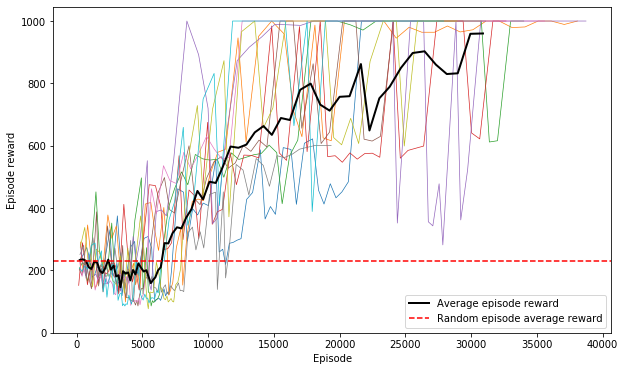

In [18]:
cherry_pick = ["log_sac_2020-06-03T18:51:53.201416.csv", "log_sac_2020-06-03T13:20:25.741204.csv"]
cherry_pick = []
frames = [pd.read_csv("../records/" + x, sep=";") for x in os.listdir("../records/") if (x > "log_sac_2020-06-03T11:13:05.708264" and x > "log_sac_2020-06-05T11:05:59.616129.csv") and (x not in cherry_pick)]
data = pd.concat(frames)
total = data.groupby("Episode").mean().reset_index()
random_mean = total[total["Episode"] < 5].median()["Reward"]

plt.figure(1, (10, 6))
for i in frames:
    plt.plot(i["Reward"].cumsum(), i["Reward"], linewidth="0.7")
#plt.plot(total["Reward"].cumsum(), total["Reward"].rolling(10).mean(), label="Average episode reward", linewidth=2, linestyle="--", color = "k")
plt.plot(total["Reward"].cumsum(), total["Reward"], label="Average episode reward", linewidth=2, color = "k")

plt.axhline(random_mean, linestyle="--", color = "red", label="Random episode average reward")
plt.ylim(0)
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Episode reward")
plt.savefig("simulation_results.png")

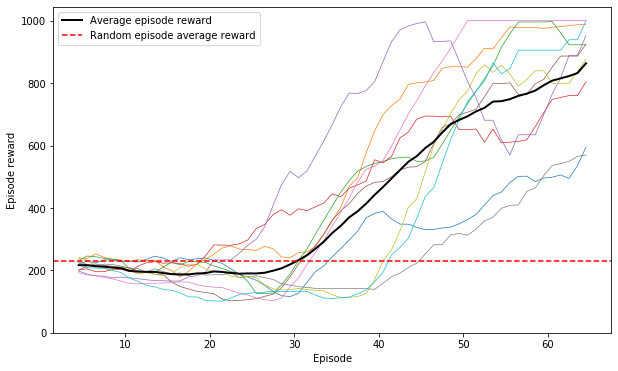

In [9]:
cherry_pick = ["log_sac_2020-06-03T18:51:53.201416.csv", "log_sac_2020-06-03T13:20:25.741204.csv"]
cherry_pick = []
frames = [pd.read_csv("../records/" + x, sep=";") for x in os.listdir("../records/") if (x > "log_sac_2020-06-03T11:13:05.708264" and x > "log_sac_2020-06-05T11:05:59.616129.csv") and (x not in cherry_pick)]
data = pd.concat(frames)
total = data.groupby("Episode").mean().reset_index()
random_mean = total[total["Episode"] < 5].median()["Reward"]

plt.figure(1, (10, 6))
for i in frames:
    rolling = i.rolling(10).mean()
    plt.plot(rolling["Episode"], rolling["Reward"], linewidth="0.7")
    
rolling_total = total.rolling(10).mean()
plt.plot(rolling_total["Episode"], rolling_total["Reward"], label="Average episode reward", linewidth=2, color = "k")
plt.axhline(random_mean, linestyle="--", color = "red", label="Random episode average reward")
plt.ylim(0)
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Episode reward")
plt.savefig("simulation_results_rolling_10.png")

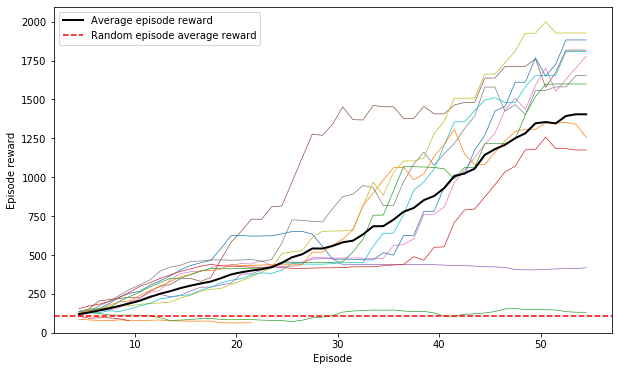

In [14]:
cherry_pick = ["log_sac_2020-06-03T18:51:53.201416.csv", "log_sac_2020-06-03T13:20:25.741204.csv"]
cherry_pick = []
frames = [pd.read_csv("../records/" + x, sep=";") for x in os.listdir("../records/") if (x > "log_sac_2020-06-05T11:05:59.616129.csv") and (x not in cherry_pick)]
data = pd.concat(frames)
total = data.groupby("Episode").mean().reset_index()
random_mean = total[total["Episode"] < 5].median()["Reward"]

plt.figure(1, (10, 6))
for i in frames:
    rolling = i.rolling(10).mean()
    plt.plot(rolling["Episode"], rolling["Reward"], linewidth="0.7")
    
rolling_total = total.rolling(10).mean()
plt.plot(rolling_total["Episode"], rolling_total["Reward"], label="Average episode reward", linewidth=2, color = "k")
plt.axhline(random_mean, linestyle="--", color = "red", label="Random episode average reward")
plt.ylim(0)
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Episode reward")
plt.savefig("simulation_results_rolling_10.png")

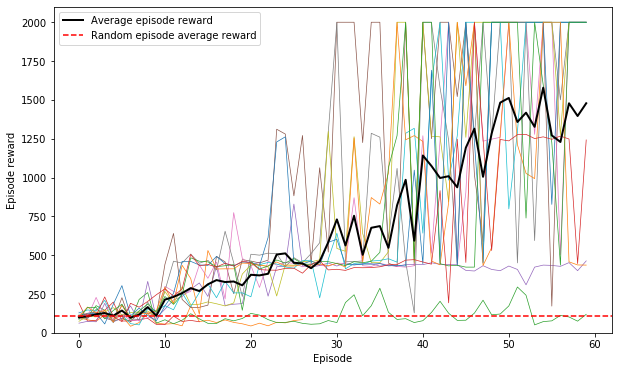

In [15]:
cherry_pick = ["log_sac_2020-06-03T18:51:53.201416.csv", "log_sac_2020-06-03T13:20:25.741204.csv"]
cherry_pick = []
frames = [pd.read_csv("../records/" + x, sep=";") for x in os.listdir("../records/") if (x > "log_sac_2020-06-05T11:05:59.616129.csv") and (x not in cherry_pick)]
data = pd.concat(frames)
total = data.groupby("Episode").mean().reset_index()
random_mean = total[total["Episode"] < 5].median()["Reward"]

plt.figure(1, (10, 6))
for i in frames:
    plt.plot(i["Episode"], i["Reward"], linewidth="0.7")
plt.plot(total["Episode"], total["Reward"], label="Average episode reward", linewidth=2, color = "k")
plt.axhline(random_mean, linestyle="--", color = "red", label="Random episode average reward")
plt.ylim(0)
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Episode reward")
plt.savefig("simulation_results.png")

In [9]:
os.listdir("../records/")

['log_sac_2020-06-01T01:20:46.560169.csv',
 'log_sac_2020-06-01T02:15:53.229908.csv',
 'log_sac_2020-06-01T03:39:42.970332.csv',
 'log_sac_2020-06-01T05:19:47.868675.csv',
 'log_sac_2020-06-01T06:52:39.449185.csv',
 'log_sac_2020-06-01T08:44:15.033677.csv',
 'log_sac_2020-06-01T09:49:03.621004.csv',
 'log_sac_2020-06-01T13:22:37.735711.csv',
 'log_sac_2020-06-01T15:41:32.802641.csv',
 'log_sac_2020-06-01T17:44:31.445687.csv',
 'log_sac_2020-06-01T19:55:55.923348.csv',
 'log_sac_2020-06-01T21:30:44.354898.csv',
 'log_sac_2020-06-01T23:31:10.604759.csv',
 'log_sac_2020-06-02T01:38:03.619892.csv',
 'log_sac_2020-06-02T04:12:05.328779.csv',
 'log_sac_2020-06-02T06:20:48.550206.csv',
 'log_sac_2020-06-02T08:24:45.921913.csv',
 'log_sac_2020-06-03T11:13:05.708264.csv',
 'log_sac_2020-06-03T13:20:25.741204.csv',
 'log_sac_2020-06-03T14:09:42.091126.csv',
 'log_sac_2020-06-03T16:26:31.252112.csv',
 'log_sac_2020-06-03T18:51:53.201416.csv',
 'log_sac_2020-06-03T20:08:29.558249.csv',
 'log_sac_2

In [90]:
all = pd.concat(frames)

(array([ 1.,  0.,  0.,  0.,  0.,  4., 14., 18.,  7., 10., 11.,  3.,  5.,
         0.,  2.,  3.,  1.,  3.,  1.,  2.]),
 array([-10.  ,   6.15,  22.3 ,  38.45,  54.6 ,  70.75,  86.9 , 103.05,
        119.2 , 135.35, 151.5 , 167.65, 183.8 , 199.95, 216.1 , 232.25,
        248.4 , 264.55, 280.7 , 296.85, 313.  ]),
 <a list of 20 Patch objects>)

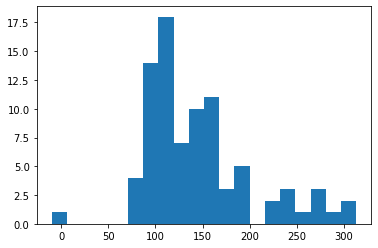

In [94]:
plt.hist(all[all.Episode < 5]["Reward"], bins=20)

(array([21.,  9., 64., 30.,  8.,  2.,  1.,  0.,  2.,  6.,  0.,  2.,  0.,
         0.,  1.,  0.,  0.,  2.,  0.,  5.]),
 array([  80.,  176.,  272.,  368.,  464.,  560.,  656.,  752.,  848.,
         944., 1040., 1136., 1232., 1328., 1424., 1520., 1616., 1712.,
        1808., 1904., 2000.]),
 <a list of 20 Patch objects>)

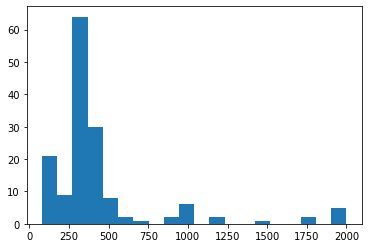

In [97]:
plt.hist(all[(all.Episode > 10) & (all.Episode < 20)]["Reward"], bins=20)

(array([ 24.,  80.,   6.,   2.,   2.,   3.,   0.,   7.,  16.,   5.,   2.,
          5.,   2.,   1.,   1.,   2.,   1.,   1.,   3., 303.]),
 array([ 250. ,  337.5,  425. ,  512.5,  600. ,  687.5,  775. ,  862.5,
         950. , 1037.5, 1125. , 1212.5, 1300. , 1387.5, 1475. , 1562.5,
        1650. , 1737.5, 1825. , 1912.5, 2000. ]),
 <a list of 20 Patch objects>)

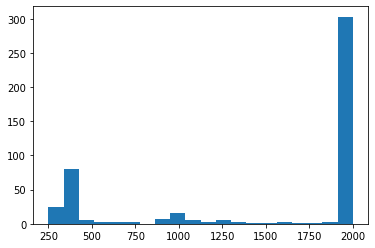

In [99]:
plt.hist(all[(all.Episode > 30) & (all.Episode < 60)]["Reward"], bins=20)

In [100]:
x, y = np.meshgrid(np.arange(60), np.arange(2000))

In [101]:
x

array([[ 0,  1,  2, ..., 57, 58, 59],
       [ 0,  1,  2, ..., 57, 58, 59],
       [ 0,  1,  2, ..., 57, 58, 59],
       ...,
       [ 0,  1,  2, ..., 57, 58, 59],
       [ 0,  1,  2, ..., 57, 58, 59],
       [ 0,  1,  2, ..., 57, 58, 59]])

In [102]:
y

array([[   0,    0,    0, ...,    0,    0,    0],
       [   1,    1,    1, ...,    1,    1,    1],
       [   2,    2,    2, ...,    2,    2,    2],
       ...,
       [1997, 1997, 1997, ..., 1997, 1997, 1997],
       [1998, 1998, 1998, ..., 1998, 1998, 1998],
       [1999, 1999, 1999, ..., 1999, 1999, 1999]])

In [103]:
x.shape

(2000, 60)

In [104]:
y.shape

(2000, 60)

In [106]:
(x * y).shape

(2000, 60)

In [117]:
vals = all.groupby(["Episode", "Reward"]).count().reset_index().values[1:]

In [120]:
z = np.zeros((60, 2000))
for v in vals:
    z[v[0], v[1] - 1] = v[2]

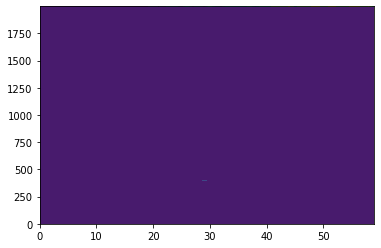

In [122]:
plt.contourf(x, y, z.T)

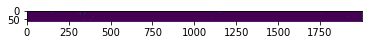

In [123]:
plt.imshow(z)